# Graduate Rotational Internship Program - The Sparks Foundation, SG

## GRIP - Computer Vision & IoT - Task 2 (Color Identification in Images using ML)

**Avish Jha**\
[LinkedIn](https://linkedin.com/in/avishj/) [GitHub](https://github.com/avishj/) [Website](https://avishj.dev/)

In this task, I shall be utilising KMeans Clustering Algorithm to detect the colors given in the sample image.\
Reference: [Towards Data Science/Color Indentification in Images](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

### Step 1: Handling Imports

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Step 2: Reading & Displaying the Image

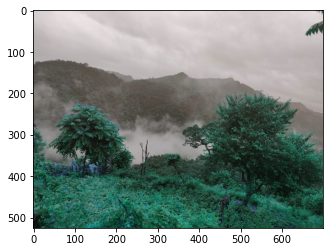

In [2]:
img = cv2.imread('task2-image.jpeg')
plt.imshow(img)
plt.show()

As we can observe here, the colors of the image seem to be off. The reasoning behind this is that OpenCV by default reads the color values as BGR instead of RGB.\
We shall fix this later on in Step 4.

### Step 3: Type & Shape Check

In [3]:
print("Type: {}".format(type(img)))
print("Shape: {}".format(img.shape))

Type: <class 'numpy.ndarray'>
Shape: (525, 700, 3)


### Step 4: Reading Colors Correctly

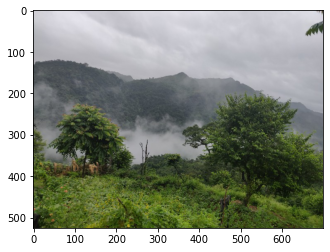

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Now, we shall convert this RGB image to grayscale, since grayscale image can be represented in the form of a 2 dimensional array and hence requires less system resources than a RGB image.

### Step 5: Conversion to Grayscale

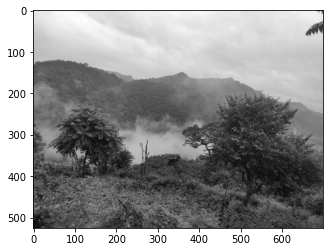

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

We shall resize the image to standardise the dimensions of the image.

### Step 6: Image Resizing

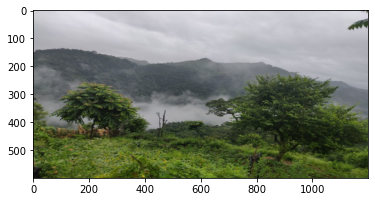

In [6]:
resized_img = cv2.resize(img, (1200, 600))
plt.imshow(resized_img)
plt.show()

Now that our image is tidied up, we can proceed with color identification.

### Step 7: Conversion (RGB => HEX)

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Step 8: Reading Image & Convert from BGR => RGB Color Space

In [8]:
def get_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

### Step 9: KMeans Clustering

KMeans needs a flattened array for its fitted input, hence numpy is used to reshape. Then KMeans is applied to the first fit, and finally predicts on the given image to give the color clusters which is ordered and plotted.

In [9]:
def get_colors(img, number_of_colors, show_chart): 
    modified_img = cv2.resize(img, (600, 400), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_img)
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

### Step 9: Getting 10 Colours Using the Above Functions in a Nested Manner

[array([178.85172367, 179.43961065, 185.90458294]),
 array([77.46675304, 93.99660352, 38.42277391]),
 array([119.66913356, 124.05202112, 124.22215009]),
 array([28.44827718, 37.45730238, 18.38685992]),
 array([205.88281232, 205.56493905, 213.05096597]),
 array([82.79340652, 89.44203751, 90.52734758]),
 array([107.85329795, 123.1981299 ,  56.9569118 ]),
 array([53.26464658, 65.77948038, 32.47496976])]

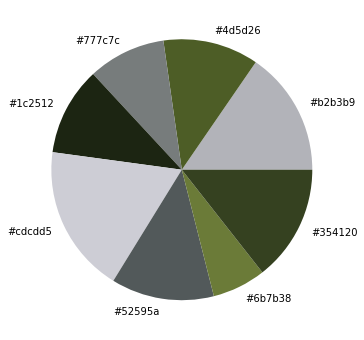

In [10]:
get_colors(get_image('task2-image.jpeg'), 8, True)

### Step 10: Search Images via Color

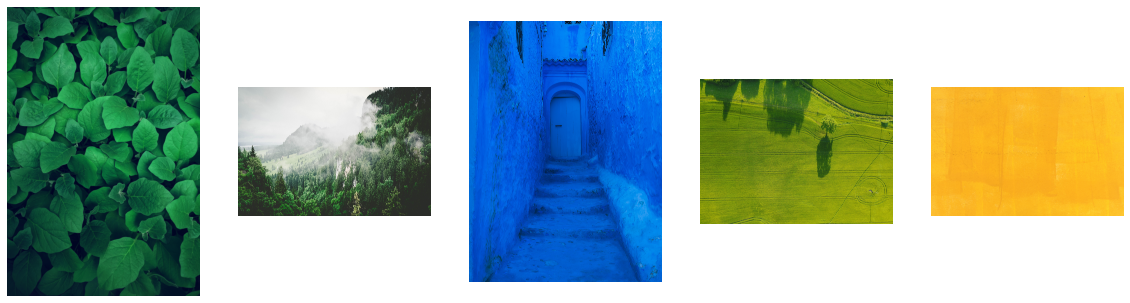

In [11]:
# Getting All the Images

COLORS, imgs = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}, []
for file in os.listdir('img'):
    if not file.startswith('.'):
        imgs.append(get_image(os.path.join('img', file)))
        
# Showing All the Images

plt.figure(figsize=(20, 10))
for i in range(len(imgs)):
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    
# Matching Images by Color

def match_img_by_color(img, color, threshold = 60, number_of_colors = 10): 
    img_colors = get_colors(img, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_img = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[img_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_img = True
    return select_img

# Show Images based on Selection

def show_selected_imgs(imgs, color, threshold, colors_to_match):
    idx = 1
    for i in range(len(imgs)):
        selected = match_img_by_color(imgs[i], color, threshold, colors_to_match)
        if (selected):
            plt.subplot(1, 5, idx)
            plt.imshow(imgs[i])
            plt.axis('off')
            idx += 1

### Step 11: Search Images via Color (Results)

Showing Green:


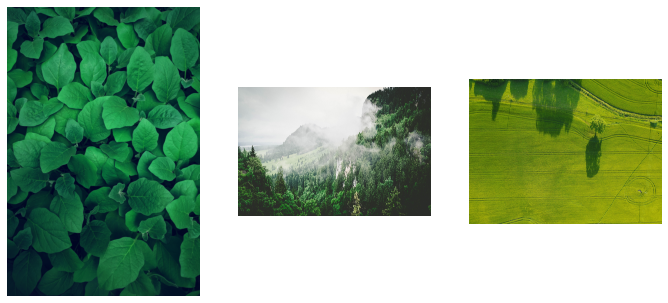

In [12]:
# Selecting GREEN

print("Showing Green:")
plt.figure(figsize = (20, 8))
show_selected_imgs(imgs, COLORS['GREEN'], 60, 5)

Showing Blue:


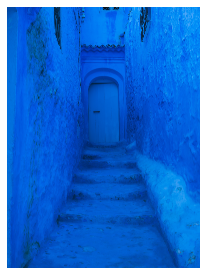

In [13]:
# Selecting BLUE

print("Showing Blue:")
plt.figure(figsize = (20, 10))
show_selected_imgs(imgs, COLORS['BLUE'], 60, 5)

Showing Yellow:


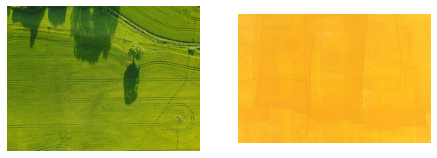

In [14]:
# Selecting YELLOW

print("Showing Yellow:")
plt.figure(figsize = (20, 10))
show_selected_imgs(imgs, COLORS['YELLOW'], 60, 5)

### Conclusion
Therefore, we have extracted the colors in the given images using KMeans Clustering Algorithm and then used it to search colors within images.